In [1]:
# Check scikit-learn version
import sklearn
# This is the version that will be used
print(sklearn.__version__)

0.23.1


In [2]:
from numpy import where
#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib import pyplot


## Looking at Synthetic classification Clustering

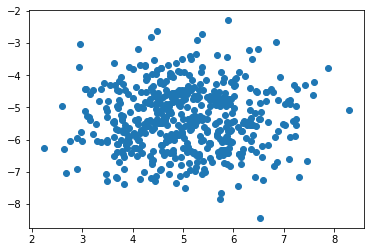

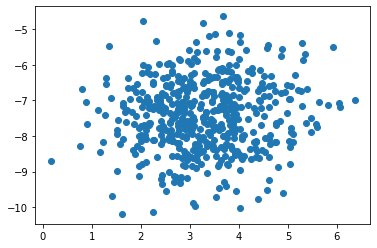

In [34]:
#Synthetic classification dataset
#Define Dataset
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X, y = make_blobs(n_samples=1000, centers=2, n_features=4)
for class_value in range(2):
    #get row indexes for samples with this class
    row_ix = where(y == class_value)
    #Create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    #Show the plot
    pyplot.show()

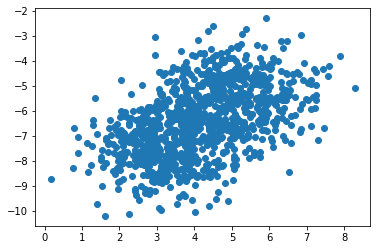

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

## Looking at Kmeans Clustering

0.6146998425475977

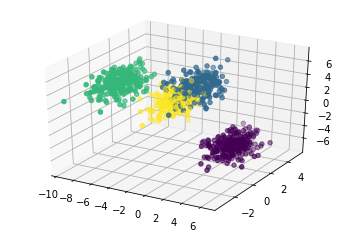

In [50]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=4, n_features=3)

km=KMeans(n_clusters=4)
km.fit(X)
labels=km.labels_

ax=plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
silhouette_score(X, labels)

2 clusters: 0.8590807998026406
2 clusters: -3063.1843507312506


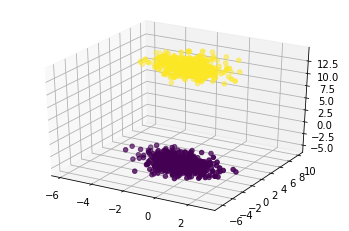

3 clusters: 0.5481162836829203
3 clusters: -2690.98016701772


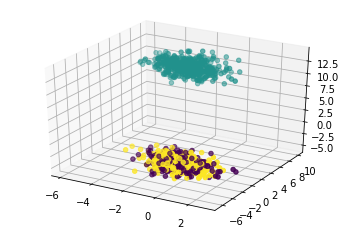

4 clusters: 0.22882965875823896
4 clusters: -2332.9754427772914


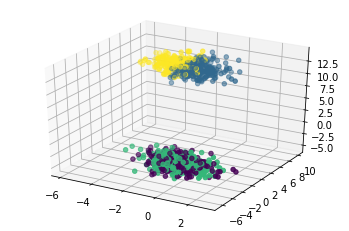

5 clusters: 0.23027842755132752
5 clusters: -2101.5057243207248


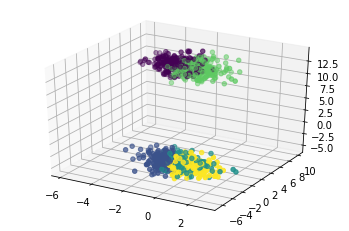

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=2, n_features=3)

guesses=[2, 3, 4, 5]
for each_guess in guesses: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

## Importing our dataset

In [3]:
import pandas as pd
df=pd.read_csv('Data/combined_data.csv')
df=df.drop(columns=['Unnamed: 0'], axis=1)

## Visualize with Correlation matrix

In [80]:
df.corr().style.background_gradient()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
beer_servings,1.000000,0.459765,0.528093,0.834837,0.466670,-0.228848,-0.189333,0.973389,-0.028525,0.028192,-0.134472,0.279126,-0.195802,0.249547,-1.000000,0.144710,-0.119331,0.293065,-0.040453,-0.464817,-0.470883,0.576986,0.615522,0.555562,0.563475,0.569183,0.487132,0.263655,-0.255878,-0.144277,0.000000
spirit_servings,0.459765,1.000000,0.200213,0.658716,0.368572,-0.240950,-0.115644,0.771052,0.032093,0.061962,0.033056,0.313822,-0.131614,0.260363,-1.000000,0.117344,-0.278950,0.133351,-0.129835,-0.373183,-0.356396,0.430316,0.397711,0.352758,0.407230,0.468077,0.415246,0.093309,-0.133384,0.043690,-0.000000
wine_servings,0.528093,0.200213,1.000000,0.669228,0.514451,-0.400454,-0.161101,0.976439,-0.005012,0.085783,-0.105014,0.286435,-0.166346,0.213148,-1.000000,0.185647,-0.167516,0.281981,-0.052147,-0.397681,-0.403221,0.557015,0.571799,0.553668,0.564182,0.460792,0.558131,0.242837,-0.073459,-0.334089,0.000000
total_litres_of_pure_alcohol,0.834837,0.658716,0.669228,1.000000,0.441442,-0.223886,-0.131390,0.994816,-0.014523,0.068698,-0.092457,0.291021,-0.126234,0.313991,-1.000000,0.174748,-0.109093,0.265198,-0.022195,-0.486981,-0.490575,0.558552,0.605799,0.505155,0.542787,0.528379,0.474923,0.204549,-0.176408,-0.211927,0.000000
Lifeexpectancy,0.466670,0.368572,0.514451,0.441442,1.000000,-0.781639,-0.254012,0.603775,0.044706,0.420757,-0.077447,0.522015,-0.283999,0.514146,-1.000000,0.497561,-0.609180,0.454491,-0.048461,-0.481794,-0.481042,0.907550,0.818586,0.758612,0.846551,0.725604,0.967911,0.410224,-0.113829,-0.321091,0.000000
AdultMortality,-0.228848,-0.240950,-0.400454,-0.223886,-0.781639,1.000000,0.196945,-0.606588,-0.043689,-0.243639,0.053310,-0.376580,0.220255,-0.380782,1.000000,-0.332580,0.624263,-0.335870,0.046170,0.306173,0.309834,-0.658280,-0.547629,-0.582015,-0.640872,-0.519958,-0.787512,-0.219055,0.024460,0.252736,0.000000
infantdeaths,-0.189333,-0.115644,-0.161101,-0.131390,-0.254012,0.196945,1.000000,-0.614072,-0.015098,-0.080129,0.792749,-0.231860,0.994394,-0.123623,1.000000,-0.110641,0.096114,-0.122286,0.271811,0.534245,0.533783,-0.206534,-0.207225,-0.251827,-0.211371,-0.288225,-0.271008,-0.003826,0.089028,0.083825,-0.000000
Alcohol,0.973389,0.771052,0.976439,0.994816,0.603775,-0.606588,-0.614072,1.000000,-0.212868,0.561207,-0.594612,0.922678,-0.614182,0.619855,-1.000000,0.574532,0.000000,-0.328932,-0.972765,-0.697650,-0.705687,0.669250,0.892838,0.755244,0.498909,0.690418,0.540042,0.576099,0.919276,-0.369681,nan
percentageexpenditure,-0.028525,0.032093,-0.005012,-0.014523,0.044706,-0.043689,-0.015098,-0.212868,1.000000,0.041573,-0.014823,0.038399,-0.015456,0.003620,-1.000000,0.035273,-0.037031,-0.030800,-0.019062,-0.016267,-0.014652,0.014386,0.018895,-0.082372,-0.010927,-0.129912,0.027764,-0.050635,-0.022966,0.094446,0.000000
HepatitisB,0.028192,0.061962,0.085783,0.068698,0.420757,-0.243639,-0.080129,0.561207,0.041573,1.000000,0.015595,0.186876,-0.097139,0.615238,-1.000000,0.919839,-0.397552,0.142116,-0.047558,-0.068317,-0.106938,0.328951,0.335061,0.249950,0.306090,0.269912,0.413978,0.201156,-0.012079,-0.151739,0.000000


## Pulling data for Kmeans Clustering

In [4]:
columns_int=['Incomecompositionofresources', 'Schooling', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']
X=df[columns_int[:3]].dropna()
len(X)

139

In [14]:
X

0      2.5669
1      4.8827
2      5.0051
6      5.9747
7      4.6768
        ...  
202    6.4554
203    6.3252
204    5.5355
205    5.5104
206    4.5528
Name: Ladder score, Length: 155, dtype: float64

## Applying Kmeans clustering with silhouette and kmeans score

Index(['Incomecompositionofresources', 'Schooling', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy'],
      dtype='object')
2 clusters: 0.5998566835164183
2 clusters: -2471.6682303999187


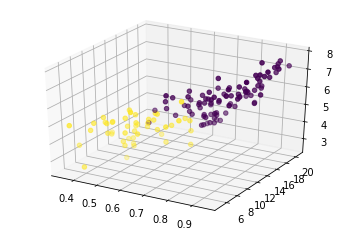

Index(['Incomecompositionofresources', 'Schooling', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy'],
      dtype='object')
3 clusters: 0.5194500311149046
3 clusters: -1413.1524265545759


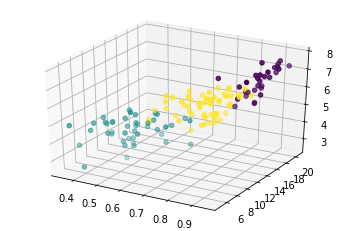

Index(['Incomecompositionofresources', 'Schooling', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy'],
      dtype='object')
4 clusters: 0.46652604455415186
4 clusters: -966.1450581136339


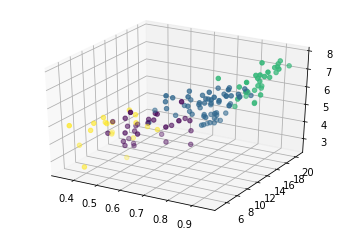

Index(['Incomecompositionofresources', 'Schooling', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy'],
      dtype='object')
5 clusters: 0.4058749686898125
5 clusters: -753.6020972692505


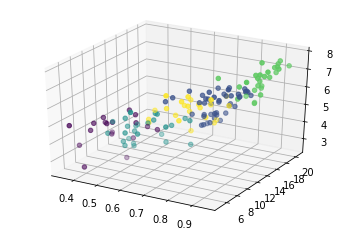

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X=df[columns_int].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

In [ ]:
# The more the clusters are mixed, implies chaos
# 3 clusters is more optimal as less chaos is implied
# need Elbow curve method